# Проект - DBSCAN

## Данные: Wholesale customers Data Set


Источник данных: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers


Описание атрибутов:

    1) FRESH: расходы за год на свежие продукты (непрерывная переменная);
    2) MILK: расходы за год на молочные продукты (непрерывная переменная);
    3) GROCERY: расходы за год на продовольственные товары / бакалея (непрерывная переменная);
    4) FROZEN: расходы за год на замороженные продукты (непрерывная переменная)
    5) DETERGENTS_PAPER: расходы за год на моющие средства и бумажные изделия (непрерывная переменная)
    6) DELICATESSEN: расходы за год на деликатесы (непрерывная переменная);
    7) CHANNEL: канал клиента - индустрия общественного питания Horeca (отели/рестораны/кафе) или розничный канал Retail (Категориальная переменная)
    8) REGION: регион клиента - Lisnon, Oporto или Other (Категориальная переменная)
 

Исходные статьи:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11

-----

## DBSCAN и примеры кластеризации данных


**Импортируем необходимые библиотеки и загрузим данные.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('../data/wholesome_customers_data.csv')

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Объем данных небольшой - всего 440 строк. Отсутствующих значений нет.

## Исследование данных (EDA - Exploratory Data Analysis)

**Построим график scatterplot, отображающий зависимость между переменными MILK и GROCERY, выполняя раскраску цветами по колонке Channel.**

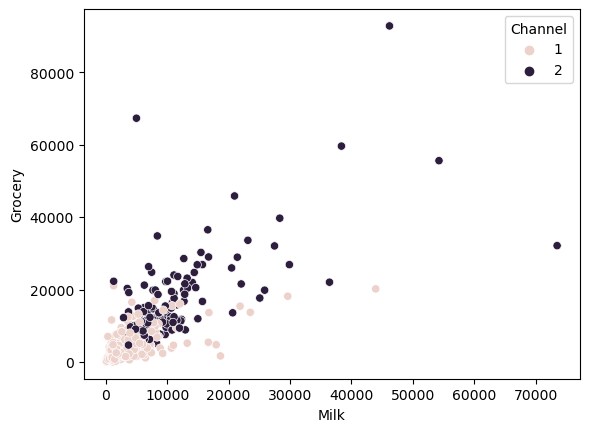

In [6]:
sns.scatterplot(data=df,x='Milk',y='Grocery',hue='Channel');

На этом графике мы видим, что для канала 1 расходы заметно меньше, чем для канала 2

**Построим гистограмму для колонки MILK, выполняя раскраску цветами по колонке Channel.**

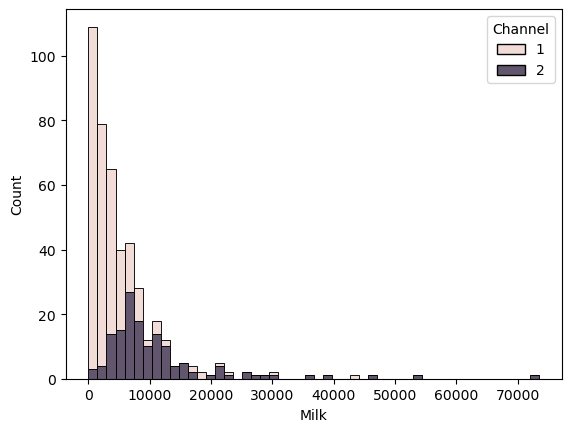

In [7]:
sns.histplot(df,x='Milk',hue='Channel',multiple="stack");

Мы видим, что для канала 2 количество клиентов меньше, но зато этиклиенты находятся заметно правее по горизонтальной оси

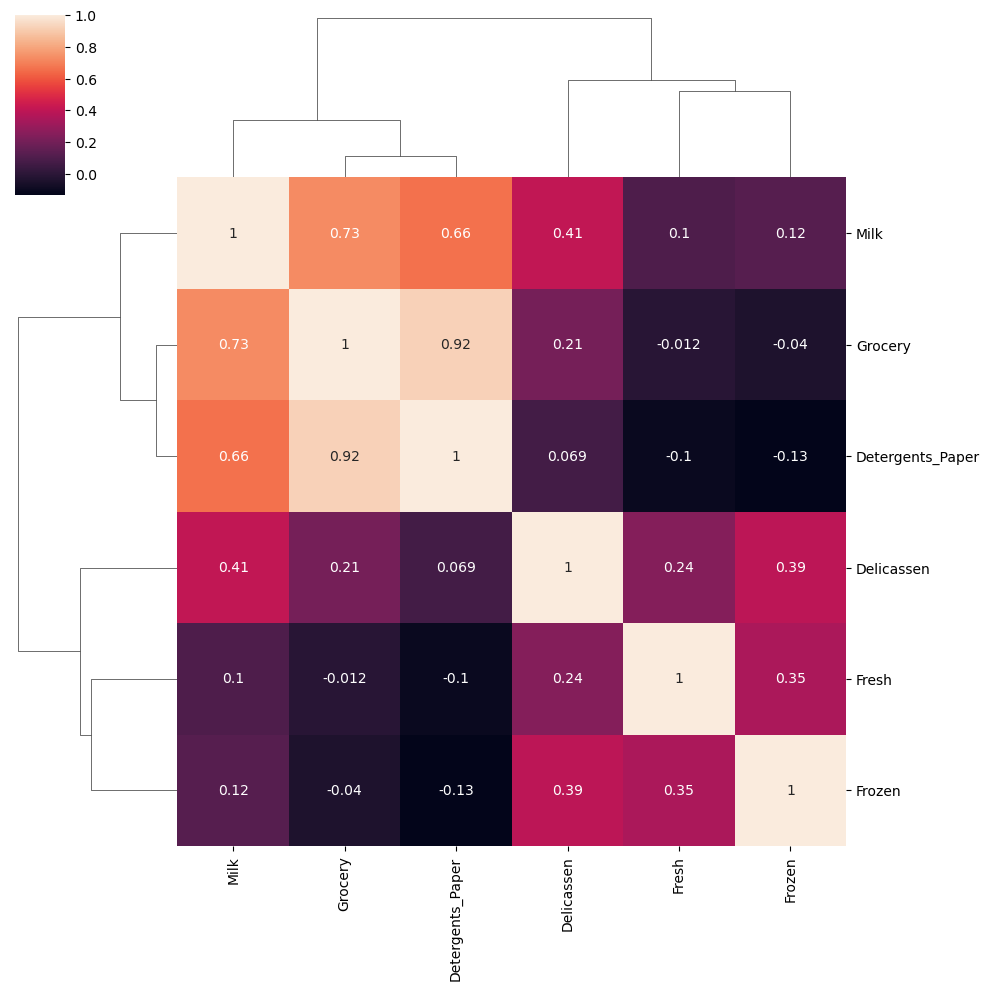

In [8]:
sns.clustermap(df.drop(['Region', 'Channel'], axis=1).corr(), annot=True);

Здесь мы видим заметную корреляцию между колонками Grosery и Milk (0,73).
Глядя на кластеры мы видим, что Grosery и Detergents_Paper сгруппированы в один кластер, а также в один кластер сгруппированы Fresh и Frozen.

**Построим график clustermap для корреляций расходов по различным категориям (с нанесением на график самих чисел).**

**Построим график PairPlot для всех колонок датафрейма, раскрашивая разными цветами по колонке Region.**

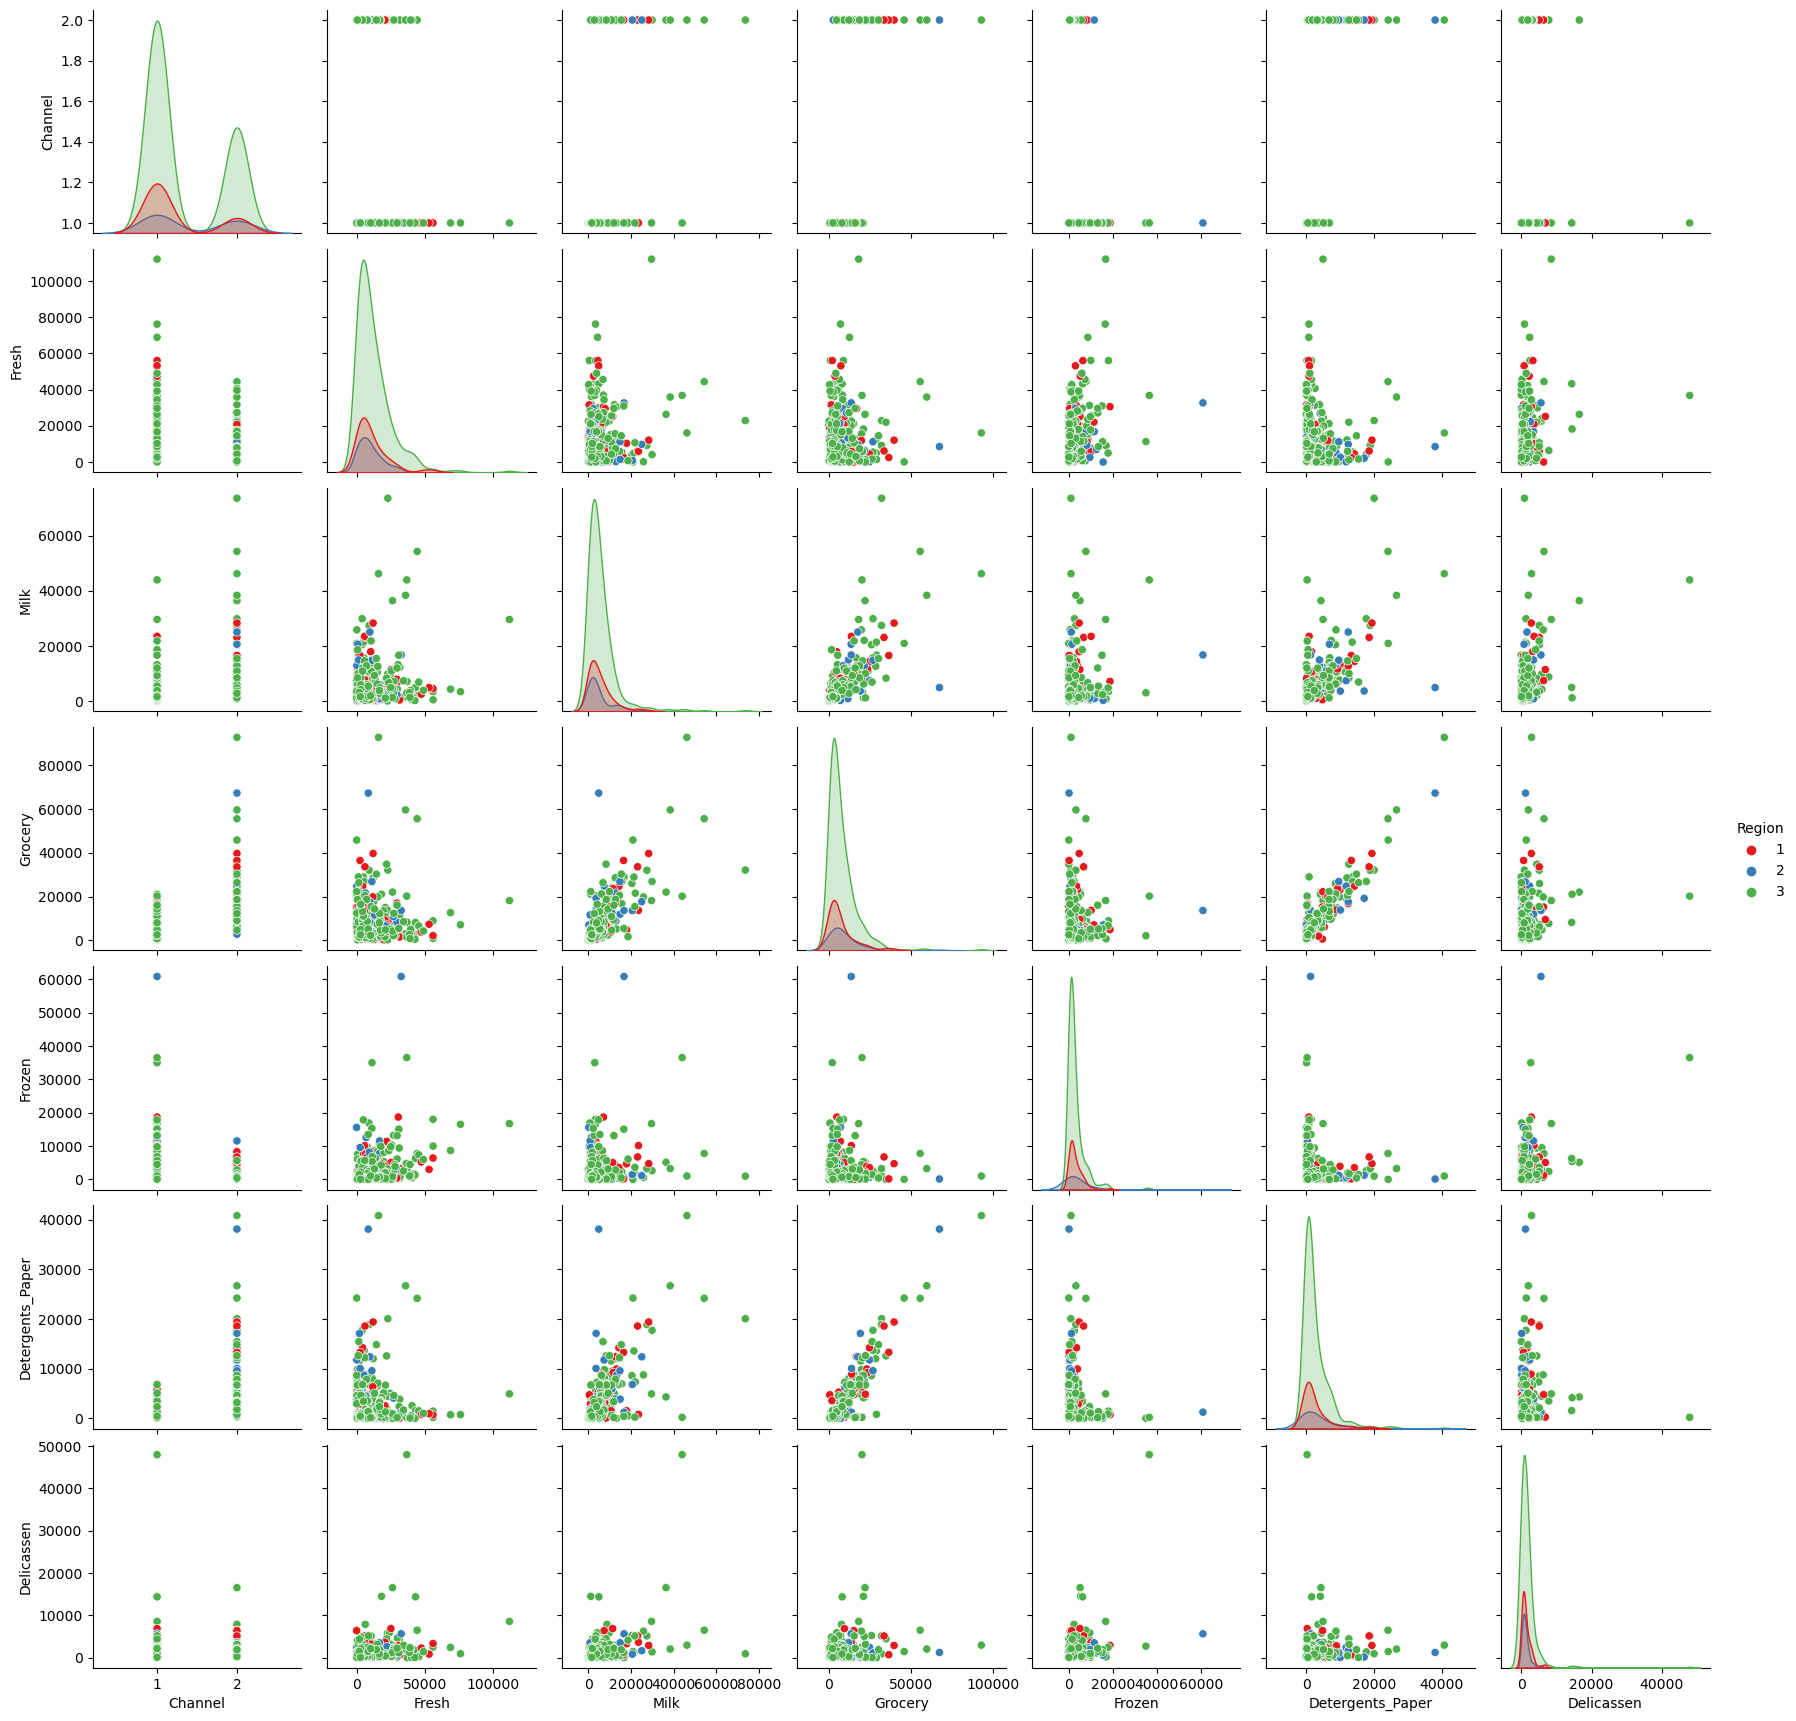

In [9]:
sns.pairplot(df,hue='Region',palette='Set1')

На первый взгляд различия по регионам не особо заметно. Посмотрим разницу по каналам, т.к. на предыдущих графиках она была заметна.

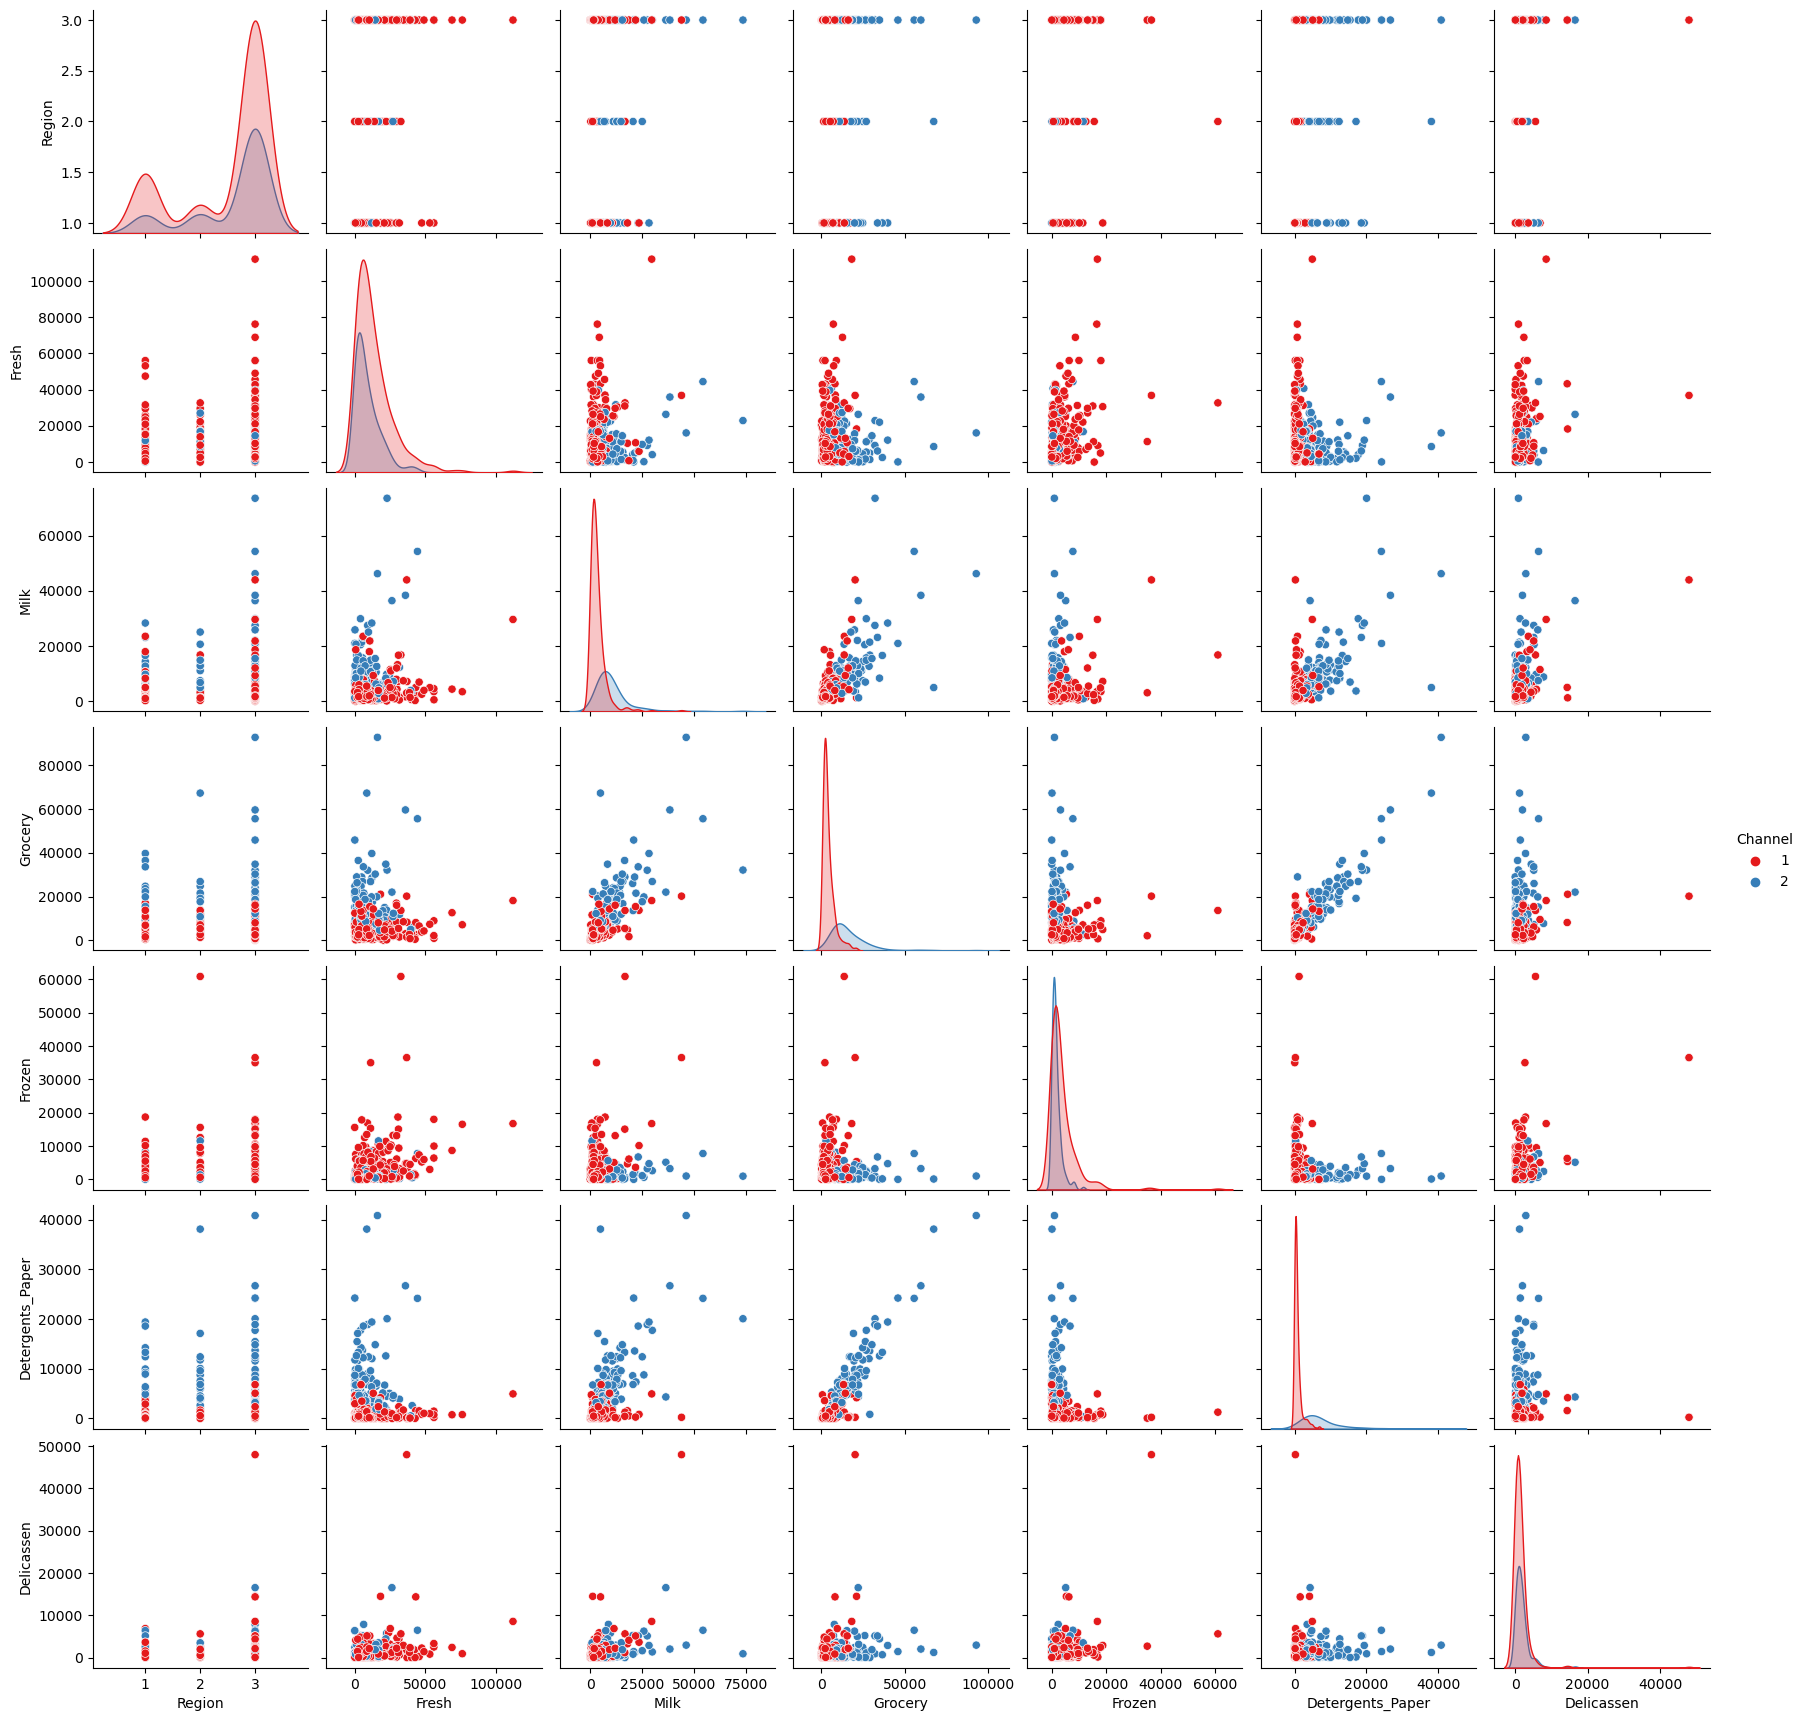

In [10]:
sns.pairplot(df,hue='Channel',palette='Set1')

На многих из этих графиков мы явно видим отдельные каналы (1 и 2).

## DBSCAN

**Поскольку значения разных признаков имеют разные масштабы единиц измерения, выполним масштабирование данных с помощью StandardScaler.**

In [11]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [12]:
scaled_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

**С помощью DBSCAN и цикла for создадим набор моделей для различных значений параметра эпсилон. В качестве параметра min_samples возьмем значение 2 умножить на количество признаков. Во время цикла сохраним процент точек-выбросов. Используем следующий диапазон значений эпсилон - (0.001,3,50)**

In [13]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    
    # Создадим модель
    # 2*scaled_X.shape[1] - с помощью этого выражения получаем количество признаков
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X.shape[1])
    dbscan.fit(scaled_X)
   
     
    # Вычислим, сколько строк имеют значение -1 и поделим их на общее количество строк
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

**Построим график lineplot для процента точек-выбросов в зависимости от значений эпсилон.**

Text(0.5, 0, 'Epsilon Value')

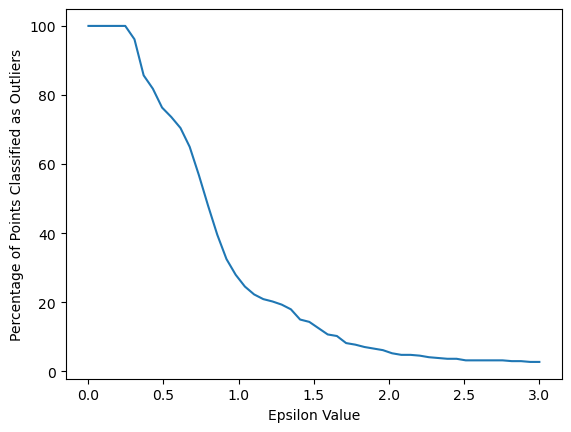

In [14]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

При эпсилон = 2 выбросы уменьшаются уже не очень сильно

## DBSCAN для выбранного значения эпсилон

**На основе графике в предыдущем задании, создадим модель DBSCAN с выбранным значением эпсилон (используем eps=2).**

In [15]:
dbscan = DBSCAN(eps=2)
dbscan.fit(scaled_X)

DBSCAN(eps=2)

**Построим график scatterplot для колонок Milk и Grocery, раскрашивая данные разными цветами по результатам работы модели DBSCAN.**

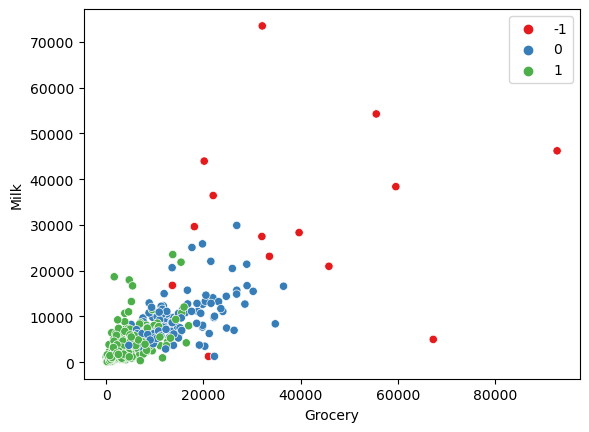

In [16]:
sns.scatterplot(data=df,x='Grocery',y='Milk',hue=dbscan.labels_, palette='Set1');

На этом графике выбросы обозначены номером кластера -1. Заметны несколько точек, которые явно находятся вдалеке от других точек. Но вместе с эти, точки того же цвета (того же кластера) находятся очень близко к другим точкам, это можно означать, что данные точки, которые DBSCAN классифицировал как выбросы отличаются от точек по каким-то другим признакам (не по Grocery и Milk)

**Построим график scatterplot для колонок Milk и Detergents Paper, раскрашивая данные разными цветами по результатам работы модели DBSCAN.**

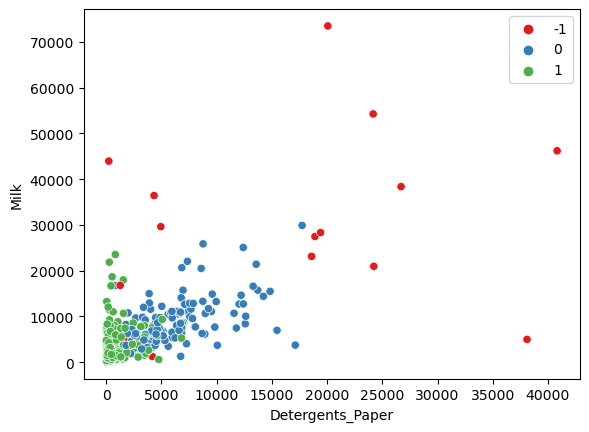

In [17]:
sns.scatterplot(data=df,x='Detergents_Paper',y='Milk',hue=dbscan.labels_, palette='Set1');

Здесь мы также видим, что часть точек-выбросов находится далеко от общей массы точек, однако несколько выбросов находится близко с основным точкам.

**Создадим новую колонку в исходном датафрейме, назовем эту колонку "Labels" и запишем в неё результаты работы модели DBSCAN - значения labels.**

In [18]:
df['Labels'] = dbscan.labels_

In [19]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


**Вычислим средние значения расходов по различных категорий, причём отдельно для каждого из кластеров (включая кластер -1 для выбросов). Сравним расходы разных кластеров между собой (по отдельным категориям расходов).**

In [20]:
cats = df.drop(['Channel','Region'],axis=1) # удаляем эти колонки, т.к. нам нужны колонки только с неприрывными значениями
cat_means = cats.groupby('Labels').mean()

In [21]:
cat_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,30161.529412,26872.411765,33575.823529,12380.235294,14612.294118,8185.411765
0,8200.681818,8849.446970,13919.113636,1527.174242,6037.280303,1548.310606
1,12662.869416,3180.065292,3747.250859,3228.862543,764.697595,1125.134021


**Выполним нормализацию таблицы с данными, полученной в предыдущем задании, с помощью MinMaxScaler - чтобы значения менялись в диапазоне от 0 до 1. После этого построим тепловую карту heatmap для получившихся значений.**

In [22]:
scaler = MinMaxScaler()
data = scaler.fit_transform(cat_means)
scaled_means = pd.DataFrame(data,cat_means.index,cat_means.columns)

In [23]:
scaled_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.239292,0.341011,0.000000,0.380758,0.059938
1,0.203188,0.000000,0.000000,0.156793,0.000000,0.000000


Мы видим, что кластер -1 тратит больше всех по всем колонкам. Класс 1 тратит меньше всех по колонкам Milk, Grocery, Detergents_Paper и Delicassen

<AxesSubplot:ylabel='Labels'>

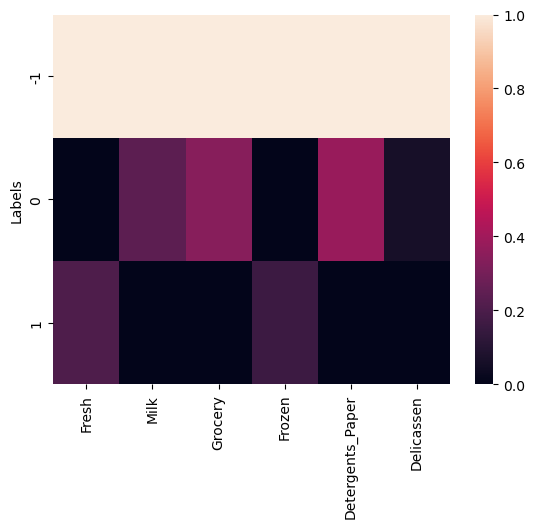

In [24]:
sns.heatmap(scaled_means)

**Построим ещё одну тепловую карту, но на этот раз предварительно удалим выбросы из рассмотрения.**

<AxesSubplot:ylabel='Labels'>

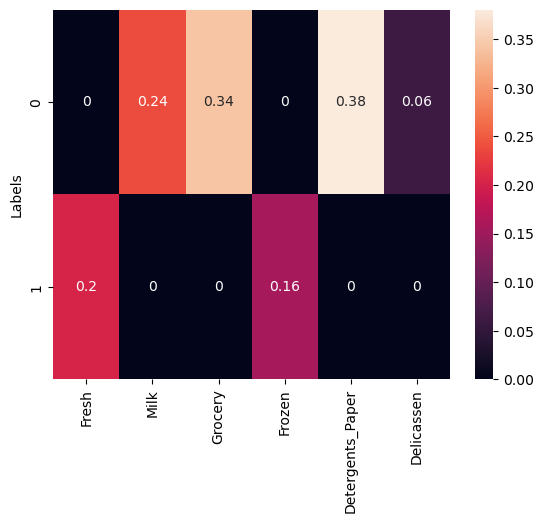

In [25]:
sns.heatmap(scaled_means.loc[[0,1]],annot=True)

Глядя на тепловую карту, эти два кластера различаются наиболее заметно по категории расходов Milk и Detergents_Paper. Но такж разница заметна и по другим категориям расходов.